In [ ]:
import pandas as pd

# Train Data
DailyData=[
    [2200, 2200, 7, 4],
    [3515, 2400, 8, 3],
    [2400, 2400, 5, 4],
    [4991, 4800, 14, 5],
    [1231, 200, 1, 1],
    [911, 0, 0, 0],
    [0, 800, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1800, 800, 6, 2]
]

Index = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10']

Columns = ['Number of Restock', 'Number of sold items', 'Number of ADS', 'Number of Visitors']

Data = pd.DataFrame(DailyData, columns=Columns, index=Index)

Data.to_csv('DailyData.csv')


# Test Data
DailyData_t=[
    [3400, 3000, 12, 6],
    [400, 0, 0, 0],
    [400, 400,0, 1],
    [0, 0, 0, 1],
    [4600, 3200, 9, 3],
    [4000, 1200, 3, 2],
    [0, 0, 0, 1],
    [3991, 3000, 4, 3],
    [5250, 3800, 13, 4],
    [6535, 7500, 21, 7]
]

Data_t = pd.DataFrame(DailyData_t, columns=Columns, index=Index)

Data_t.to_csv('DailyData_t.csv')

In [ ]:
# Checking Data

import statistics

# Data['Number of Restock']
print(statistics.mean(Data['Number of Restock']))

# Data['Number of sold items']
print(statistics.mean(Data['Number of sold items']))

# Data['Number of ADS']
print(statistics.mean(Data['Number of ADS']))

# Data['Number of Visitors']
print(statistics.mean(Data['Number of Visitors']))

print(statistics.mean(Data_t['Number of Restock']))
print(statistics.mean(Data_t['Number of sold items']))
print(statistics.mean(Data_t['Number of ADS']))
print(statistics.mean(Data_t['Number of Visitors']))

1704.8
1360
4.1
2
2857.6
2210
6.2
2.8


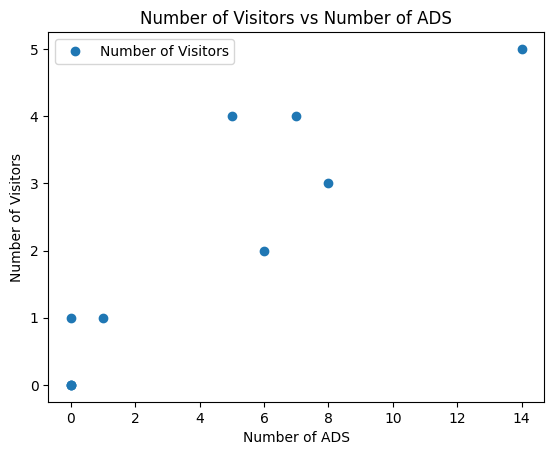

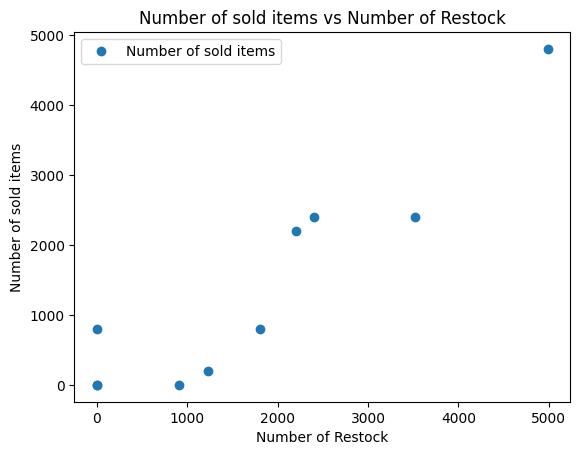

In [ ]:
import matplotlib.pyplot as plt

# Linearity Checking

Data.plot(x='Number of ADS', y='Number of Visitors', style='o')
plt.title("Number of Visitors vs Number of ADS")
plt.xlabel('Number of ADS')
plt.ylabel('Number of Visitors')
plt.show()

Data.plot(x='Number of Restock', y='Number of sold items', style='o')
plt.title("Number of sold items vs Number of Restock")
plt.xlabel('Number of Restock')
plt.ylabel('Number of sold items')
plt.show()

If the number of ADS is 0 and the number of visitors is greater than 1, it indicates a returning visitor.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

LR_V = LinearRegression()
LR_S = LinearRegression()

LR_V.fit(Data['Number of ADS'].values.reshape(-1, 1), Data['Number of Visitors'].values.reshape(-1, 1))
LR_S.fit(Data['Number of Restock'].values.reshape(-1, 1), Data['Number of sold items'].values.reshape(-1, 1))

predicted_visitors = LR_V.predict([[13], [14], [8], [7], [7], [0], [0], [0], [9], [10]])  # give Number of ADS in params
predicted_sold_items = LR_S.predict([[4800], [3200], [600], [6600], [1200], [800], [0], [600], [1561], [2800]])  # give Number of Restock in params

# Adjust negative predictions to 0
predicted_visitors = [max(0, value[0]) for value in predicted_visitors]
predicted_sold_items = [max(0, value[0]) for value in predicted_sold_items]

print('predicted visitors:', predicted_visitors)
print('predicted sold items:', predicted_sold_items)


predicted visitors: [5.202069985214392, 5.561853129620504, 3.4031542631838345, 3.0433711187777233, 3.0433711187777233, 0.5248891079349434, 0.5248891079349434, 0.5248891079349434, 3.7629374075899458, 4.122720551996058]
predicted sold items: [4087.967040488557, 2677.8005682794296, 386.2800509395978, 5674.404321723825, 915.0924780180205, 562.5508599657387, 0, 386.2800509395978, 1233.2612883102047, 2325.2589502271476]


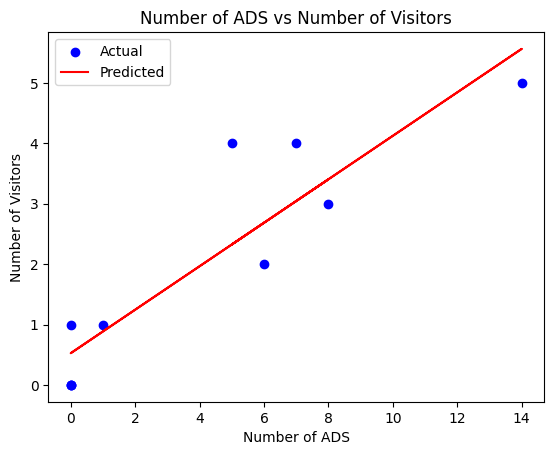

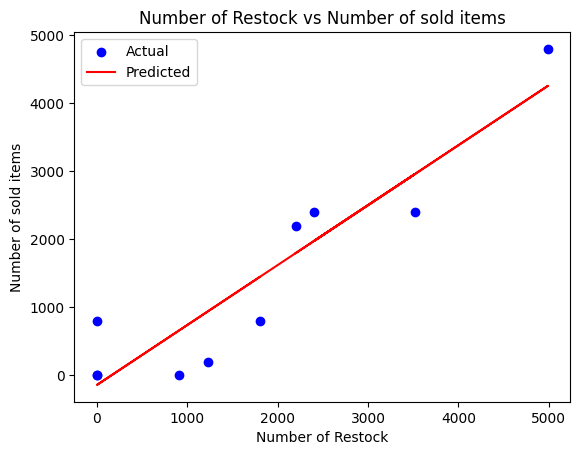

In [ ]:
plt.scatter(Data['Number of ADS'], Data['Number of Visitors'], color='blue', label='Actual')
plt.plot(Data['Number of ADS'], LR_V.predict(Data['Number of ADS'].values.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Number of ADS')
plt.ylabel('Number of Visitors')
plt.title('Number of ADS vs Number of Visitors')
plt.legend()
plt.show()

plt.scatter(Data['Number of Restock'], Data['Number of sold items'], color='blue', label='Actual')
plt.plot(Data['Number of Restock'], LR_S.predict(Data['Number of Restock'].values.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Number of Restock')
plt.ylabel('Number of sold items')
plt.title('Number of Restock vs Number of sold items')
plt.legend()
plt.show()


In [ ]:
# Calculate MSE
mse_visitors = mean_squared_error(Data['Number of Visitors'].values.reshape(-1, 1), predicted_visitors)
mse_sold_items = mean_squared_error(Data['Number of sold items'].values.reshape(-1, 1), predicted_sold_items)

print('MSE of visitors: ', mse_visitors)
print('MSE of sold items: ', mse_sold_items)


MSE of visitors:  3.5810438634865918
MSE of sold items:  1392562.4923213236


---

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
scaled_Data_std = scaler.fit_transform(Data)

scaled_Data_std_df = pd.DataFrame(scaled_Data_std, columns=Columns, index=Index)

scaled_Data_std_df

LR_V = LinearRegression()
LR_S = LinearRegression()

LR_V.fit(scaled_Data_std_df['Number of ADS'].values.reshape(-1, 1), scaled_Data_std_df['Number of Visitors'].values.reshape(-1, 1))
LR_S.fit(scaled_Data_std_df['Number of Restock'].values.reshape(-1, 1), scaled_Data_std_df['Number of sold items'].values.reshape(-1, 1))

predicted_visitors = LR_V.predict([[13], [14], [8], [7], [7], [0], [0], [0], [9], [10]])  # give Number of ADS in params
predicted_sold_items = LR_S.predict([[4800], [3200], [600], [6600], [1200], [800], [0], [600], [1561], [2800]])  # give Number of Restock in params

# Adjust negative predictions to 0
predicted_visitors = [max(0, value[0]) for value in predicted_visitors]
predicted_sold_items = [max(0, value[0]) for value in predicted_sold_items]

print('predicted visitors:', predicted_visitors)
print('predicted sold items:', predicted_sold_items)

# Calculate MSE
mse_visitors = mean_squared_error(scaled_Data_std_df['Number of Visitors'].values.reshape(-1, 1), predicted_visitors)
mse_sold_items = mean_squared_error(scaled_Data_std_df['Number of sold items'].values.reshape(-1, 1), predicted_sold_items)

print('MSE of visitors: ', mse_visitors)
print('MSE of sold items: ', mse_sold_items)

predicted visitors: [11.77742099917544, 12.683376460650475, 7.247643691800271, 6.3416882303252375, 6.3416882303252375, 0, 0, 0, 8.153599153275305, 9.05955461475034]
predicted sold items: [4431.605755547653, 2954.4038370317685, 553.9507194434566, 6093.457913878022, 1107.9014388869132, 738.6009592579421, 8.88241302397551e-17, 553.9507194434566, 1441.1951217520595, 2585.1033574027974]
MSE of visitors:  53.84245232013412
MSE of sold items:  7661501.684724535


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalization
scaler = MinMaxScaler()
scaled_Data_mms = scaler.fit_transform(Data)

scaled_Data_mms_df = pd.DataFrame(scaled_Data_mms, columns=Columns, index=Index)

scaled_Data_mms_df

LR_V = LinearRegression()
LR_S = LinearRegression()

LR_V.fit(scaled_Data_mms_df['Number of ADS'].values.reshape(-1, 1), scaled_Data_mms_df['Number of Visitors'].values.reshape(-1, 1))
LR_S.fit(scaled_Data_mms_df['Number of Restock'].values.reshape(-1, 1), scaled_Data_mms_df['Number of sold items'].values.reshape(-1, 1))

predicted_visitors = LR_V.predict([[13], [14], [8], [7], [7], [0], [0], [0], [9], [10]])  # give Number of ADS in params
predicted_sold_items = LR_S.predict([[4800], [3200], [600], [6600], [1200], [800], [0], [600], [1561], [2800]])  # give Number of Restock in params

# Adjust negative predictions to 0
predicted_visitors = [max(0, value[0]) for value in predicted_visitors]
predicted_sold_items = [max(0, value[0]) for value in predicted_sold_items]

print('predicted visitors:', predicted_visitors)
print('predicted sold items:', predicted_sold_items)

# Calculate MSE
mse_visitors = mean_squared_error(scaled_Data_mms_df['Number of Visitors'].values.reshape(-1, 1), predicted_visitors)
mse_sold_items = mean_squared_error(scaled_Data_mms_df['Number of sold items'].values.reshape(-1, 1), predicted_sold_items)

print('MSE of visitors: ', mse_visitors)
print('MSE of sold items: ', mse_sold_items)

predicted visitors: [13.201084277969446, 14.208477082306558, 8.164120256283885, 7.156727451946773, 7.156727451946773, 0.1049778215869886, 0.1049778215869886, 0.1049778215869886, 9.171513060620997, 10.178905864958109]
predicted sold items: [4398.808345002317, 2932.5289985865347, 549.8250606608892, 6048.3726097200715, 1099.6798155668075, 733.109978962862, 0, 549.8250606608892, 1430.5090931018683, 2565.959161982589]
MSE of visitors:  65.92838783134934
MSE of sold items:  7549335.969611017
